Explore the bash history of this computer
========

Load the bash history on this computer

In [1]:
from os.path import expanduser
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt
import numpy as np

def counts_of(corpus, ngram_range):
    vectorizer = CountVectorizer(ngram_range=ngram_range)
    matrix = vectorizer.fit_transform(corpus)
    counts = matrix.toarray().sum(axis=0)
    words = vectorizer.get_feature_names()
    return list(zip(words, counts))

home = expanduser("~")
with (open(home + "/.bash_history")) as f:
    history = f.read()
    corpus = history.split('\n')
    unigram_count = counts_of(corpus, (1,1))
    bigram_count = counts_of(corpus, (2,2))

In [2]:
def plot_histogram_of(words):
    sorted_word_count = sorted(words, key = lambda x: -x[1])
    top = sorted_word_count[:10]
    top_words = list(map(lambda x: x[0], top))
    top_counts = list(map(lambda x: x[1], top))
    _ = plt.bar(top_words, top_counts) 
    plt.xticks(rotation='vertical')
    plt.title("Most popular CLI n-grams")
    plt.show()
    

The most popular unigrams are:

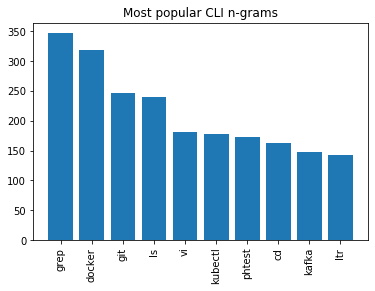

In [3]:
plot_histogram_of(unigram_count)

The most popular bigrams are:

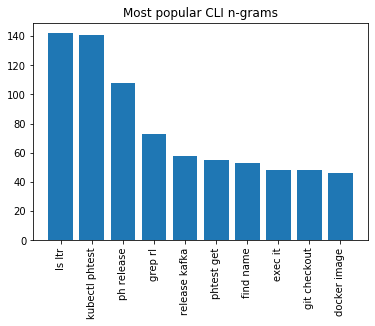

In [4]:
plot_histogram_of(bigram_count)

The entropy in the corpus:

In [5]:
from scipy.stats import entropy
import random
import statistics 

def probabilities_of(word_count):
    words, counts = zip(*word_count)
    total = sum(counts)
    ps = map(lambda x: x / total, counts)
    return list(ps)

def chunks(lst, n):
    """Yield successive n-sized chunks from lst."""
    for i in range(0, len(lst), n):
        yield lst[i:i + n]
        
def randomized_chunks_of(corpus):
    randomized_corpus = random.sample(corpus, len(corpus))
    return list(chunks(randomized_corpus[:2000], 100))
        
def entropy_of(corpus, ngram_range):
    entropy_results = []
    for chunk in randomized_chunks_of(corpus):
        h = entropy(probabilities_of(counts_of(chunk, ngram_range)))
        entropy_results.append(h)
        
    return entropy_results
    
print('unigram entropy ', entropy(probabilities_of(unigram_count)))
print('bigram entropy  ', entropy(probabilities_of(bigram_count)))

ngram_range = (1, 3)
hs = entropy_of(corpus, ngram_range)

print('mean = {}, std dev = {} for n-grams in range {}'.format(statistics.mean(hs), statistics.stdev(hs), ngram_range))

unigram entropy  5.475679516843316
bigram entropy   6.675011966815179
mean = 6.273700400078054, std dev = 0.09154998252627412 for n-grams in range (1, 3)


Now, with the history from another box albeit by the same programmer

In [12]:
with (open(home + "/.bash_history3")) as f:
    history = f.read()
    corpus2 = history.split('\n')
    unigram_count2 = counts_of(corpus2, (1,1))
    bigram_count2 = counts_of(corpus2, (2,2))

hs = entropy_of(corpus2, ngram_range)

print('mean = {}, std dev = {} for n-grams in range {}'.format(statistics.mean(hs), statistics.stdev(hs), ngram_range))

mean = 6.19712458193756, std dev = 0.10449294580250527 for n-grams in range (1, 3)


Let's compare the two

In [26]:
def contains(x, xs):
    if x in xs:
        return True
    else: 
        return False

def words_of(word_count):
    return set(map(lambda x: x[0], word_count))

def remove_non_common(word_count1, word_count2):
    words1 = words_of(word_count1)
    words2 = words_of(word_count2)
    wc1 = filter(lambda x: contains(x[0], words2), word_count1)
    wc2 = filter(lambda x: contains(x[0], words1), word_count2)
    return list(wc1), list(wc2)

def padding(xs, ys, alpha):
    diff = xs - ys
    return list(map(lambda x: [x, alpha], diff))

def smoothing(word_count1, word_count2, alpha):
    words1 = words_of(word_count1)
    words2 = words_of(word_count2)
    padding1 = padding(words2, words1, alpha)
    padding2 = padding(words1, words2, alpha)
    return word_count1 + padding1, word_count2 + padding2

ngrams1 = counts_of(corpus, ngram_range)
ngrams2 = counts_of(corpus2, ngram_range)
print('len(ngrams1) = {}\nlen(ngrams2) = {}'.format(len(ngrams1), len(ngrams2)))
# wc1, wc2 = remove_non_common(ngrams1, ngrams2)
wc1, wc2 = smoothing(ngrams1, ngrams2, 1e-10)

print('len(wc1) = {}\nlen(wc2) = {}'.format(len(wc1), len(wc2)))

comparison = entropy(probabilities_of(wc1), probabilities_of(wc2))
print('Comparative entropy of both corpii = {}'.format(comparison))

len(ngrams1) = 4410
len(ngrams2) = 4206
len(wc1) = 7756
len(wc2) = 7756
Comparative entropy of both corpii = 2.6976081175835027
